In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lending-club-dataset/lending_club_loan_two.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
%matplotlib inline

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [3]:
data = pd.read_csv("/kaggle/input/lending-club-dataset/lending_club_loan_two.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.00,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.00,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.00,0.00,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.00,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.00,0.00,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,395754.00,396030.00,358235.00,395495.00
mean,14113.89,13.64,431.85,74203.18,17.38,11.31,0.18,15844.54,53.79,25.41,1.81,0.12
std,8357.44,4.47,250.73,61637.62,18.02,5.14,0.53,20591.84,24.45,11.89,2.15,0.36
min,500.00,5.32,16.08,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,11.28,8.00,0.00,6025.00,35.80,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,16.91,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,22.98,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,40000.00,30.99,1533.81,8706582.00,9999.00,90.00,86.00,1743266.00,892.30,151.00,34.00,8.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

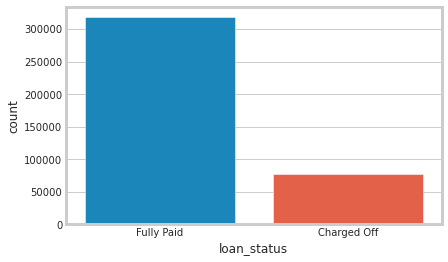

In [6]:
sns.countplot(data.loan_status)

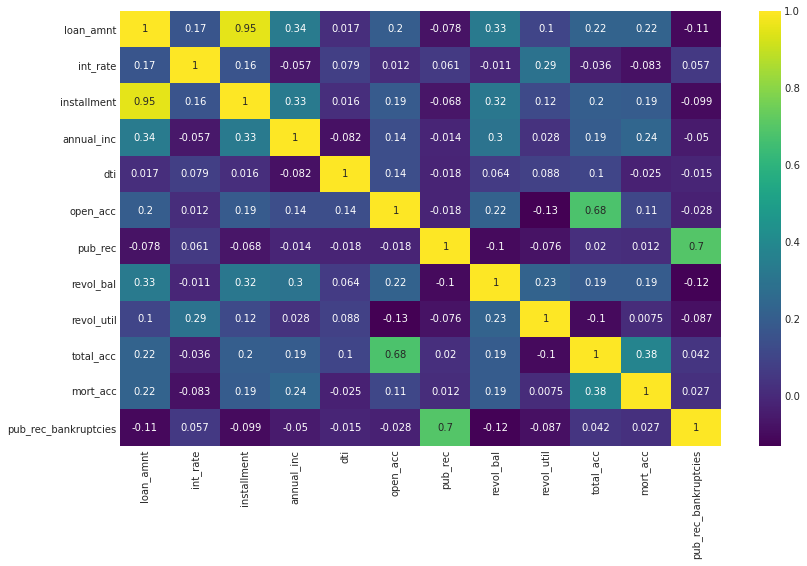

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

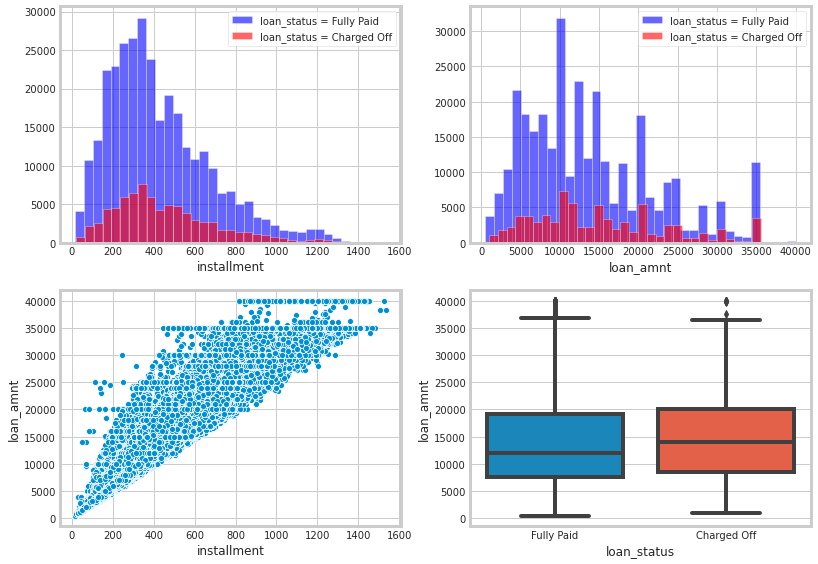

In [8]:

plt.figure(figsize=(12, 20))

plt.subplot(4, 2, 1)
data[data["loan_status"] == "Fully Paid"]["installment"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["installment"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("installment")

plt.subplot(4, 2, 2)
data[data["loan_status"] == "Fully Paid"]["loan_amnt"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["loan_amnt"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("loan_amnt")

plt.subplot(4, 2, 3)
sns.scatterplot(x='installment', y='loan_amnt', data=data)

plt.subplot(4, 2, 4)
sns.boxplot(x='loan_status', y='loan_amnt', data=data)

In [9]:
data.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.00,15126.30,8505.09,1000.00,8525.00,14000.00,20000.00,40000.00
Fully Paid,318357.00,13866.88,8302.32,500.00,7500.00,12000.00,19225.00,40000.00


In [10]:
print(f"GRADE unique: {data.grade.unique()}")
print(f"SUB_GRADE unique: {data.sub_grade.unique()}")

GRADE unique: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
SUB_GRADE unique: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


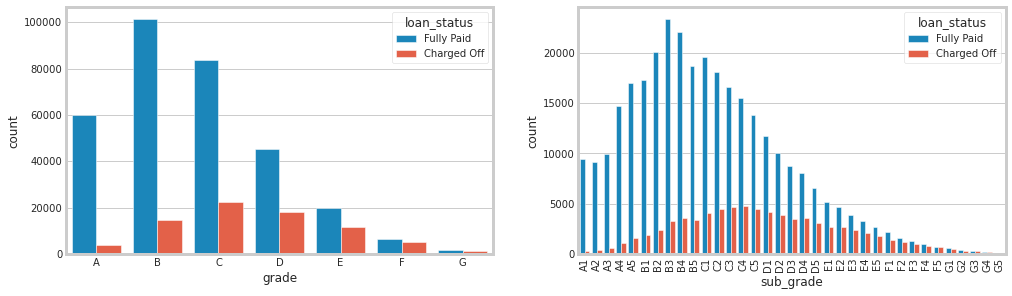

In [11]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

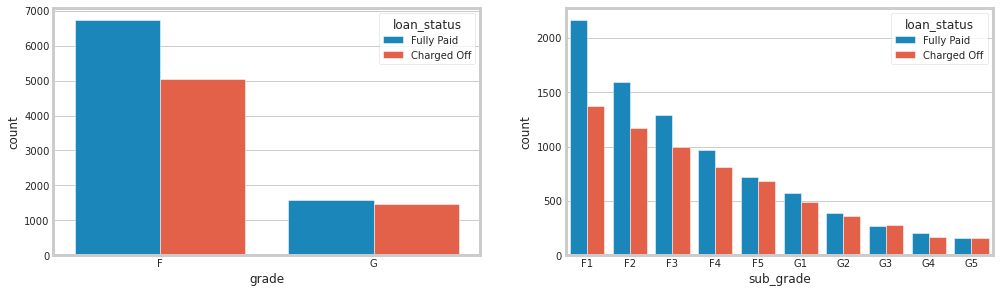

In [12]:
df = data[(data.grade == 'F') | (data.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)

In [13]:
data.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [14]:
data.loc[(data.home_ownership == 'ANY') | (data.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  
data.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

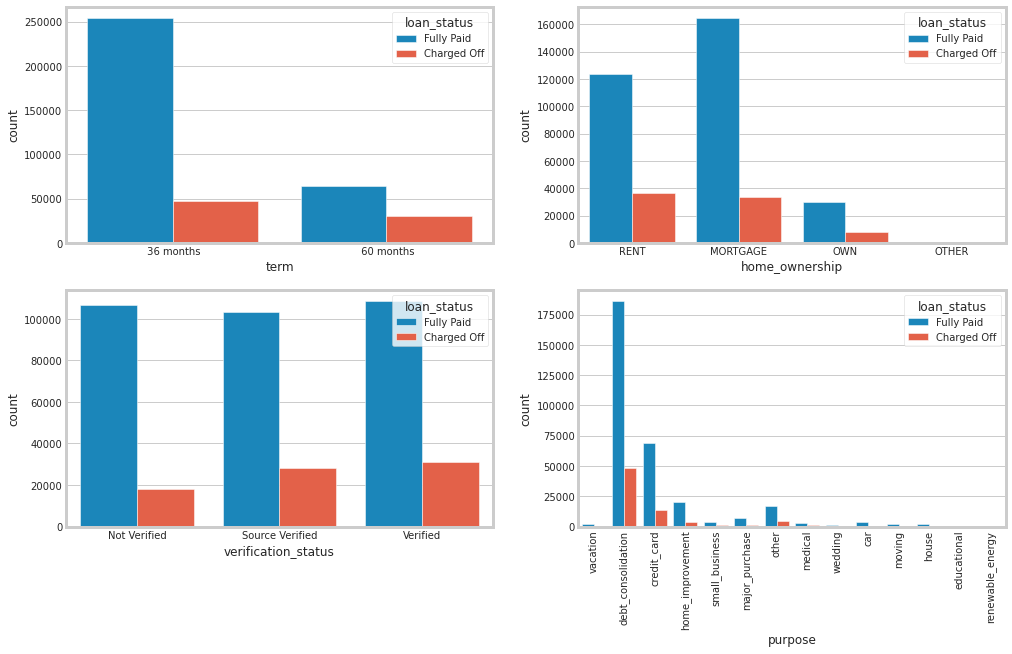

In [15]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=data, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=data, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=data, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

Text(0.5, 0, 'annual_inc')

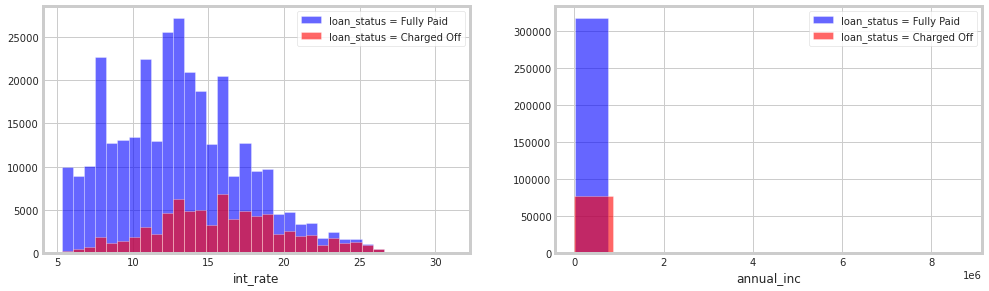

In [16]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
data[data["loan_status"] == "Fully Paid"]["int_rate"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["int_rate"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("int_rate")

plt.subplot(2, 2, 2)
data[data["loan_status"] == "Fully Paid"]["annual_inc"].hist(bins=10, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["annual_inc"].hist(bins=10, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("annual_inc")

In [17]:
data[data.annual_inc >= 1000000].shape

(75, 27)

In [18]:
data.emp_title.isna().sum()
data['emp_title'] = data.emp_title.str.lower()

In [19]:
def manager(string):
    if type(string) is str:
        return 'manager' if 'manager' in string else string

def president(string):
    if type(string) is str:
        return 'president' if 'president' in string else string
    
def nurse(string):
    if type(string) is str:
        return 'nurse' if 'nurse' in string else string
    
def driver(string):
    if type(string) is str:
        return 'driver' if 'driver' in string else string
    
def assistant(string):
    if type(string) is str:
        return 'assistant' if 'assistant' in string else string

def engineer(string):
    if type(string) is str:
        return 'engineer' if 'engineer' in string else string    

functions = [manager, president, nurse, driver, assistant, engineer]
for func in functions:
    data['emp_title'] = data.emp_title.apply(func)

In [20]:
data.emp_title.value_counts()[:30]

manager              39831
engineer              8603
assistant             7548
driver                5743
teacher               5430
nurse                 5146
president             3276
supervisor            2591
sales                 2382
owner                 2201
rn                    2074
director              1192
police officer        1041
accountant             845
technician             839
mechanic               753
attorney               744
analyst                703
us army                671
paralegal              586
customer service       563
server                 538
electrician            527
foreman                506
operator               490
controller             470
consultant             463
bank of america        459
clerk                  452
account executive      447
Name: emp_title, dtype: int64

Text(0.5, 1.0, 'The most 30 jobs title afforded a loan')

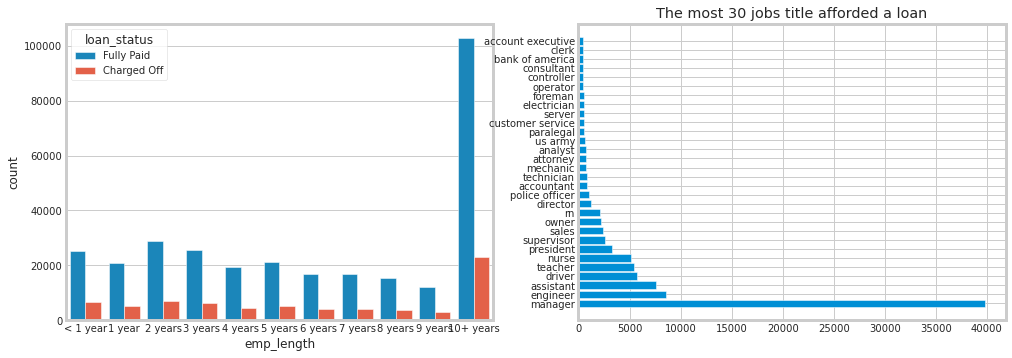

In [21]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
sns.countplot(x='emp_length', data=data, hue='loan_status', order=order)

plt.subplot(2, 2, 2)
plt.barh(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")

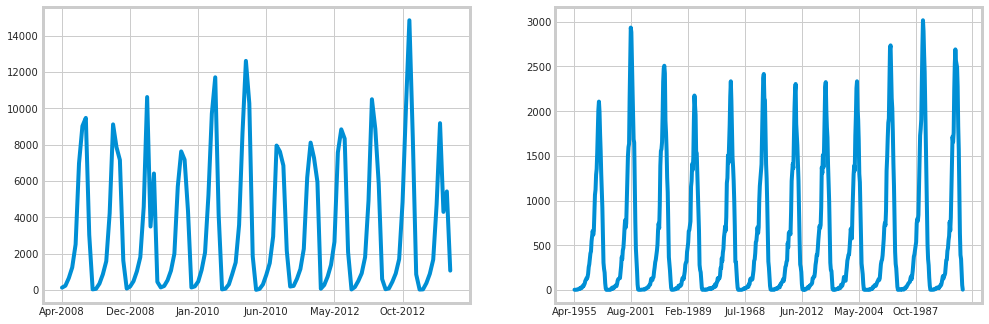

In [22]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
data.issue_d.value_counts().sort_index().plot()

plt.subplot(2, 2, 2)
data.earliest_cr_line.value_counts().sort_index().plot()

In [23]:
data.title.isna().sum()

1755

In [24]:
data['title'] = data.title.str.lower()

In [25]:
data.title.value_counts()[:30]

debt consolidation           168108
credit card refinancing       51781
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
debt consolidation loan        3513
business                       3017
medical expenses               2820
credit card consolidation      2638
personal loan                  2460
car financing                  2160
credit card payoff             1904
consolidation loan             1887
vacation                       1866
credit card refinance          1832
moving and relocation          1693
consolidate                    1528
personal                       1465
home buying                    1196
loan                           1150
payoff                         1035
credit cards                   1030
freedom                         934
debt                            933
my loan                         897
credit card loan                879
credit card                 

In [26]:
data.dti.value_counts()

0.00     313
14.40    310
19.20    302
16.80    301
18.00    300
        ... 
46.51      1
43.24      1
46.77      1
92.13      1
40.14      1
Name: dti, Length: 4262, dtype: int64

In [27]:
data[data.open_acc > 40].shape


(217, 27)

In [28]:
data[data.total_acc > 80].shape

(266, 27)

In [29]:
data[data.revol_bal < 10000].shape

(177624, 27)

In [30]:
data[data.revol_util > 200]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
137211,3500.00,36 months,12.49,117.08,B,B4,budget analyst,10+ years,RENT,45000.00,Verified,Apr-2014,Fully Paid,debt_consolidation,debt consolidation,14.67,Oct-1998,2.00,0.00,2677.00,892.30,9.00,f,INDIVIDUAL,0.00,0.00,"12506 Connie Burg\r\nVelasquezfort, TN 00813"


Text(0.5, 0, 'total_acc')

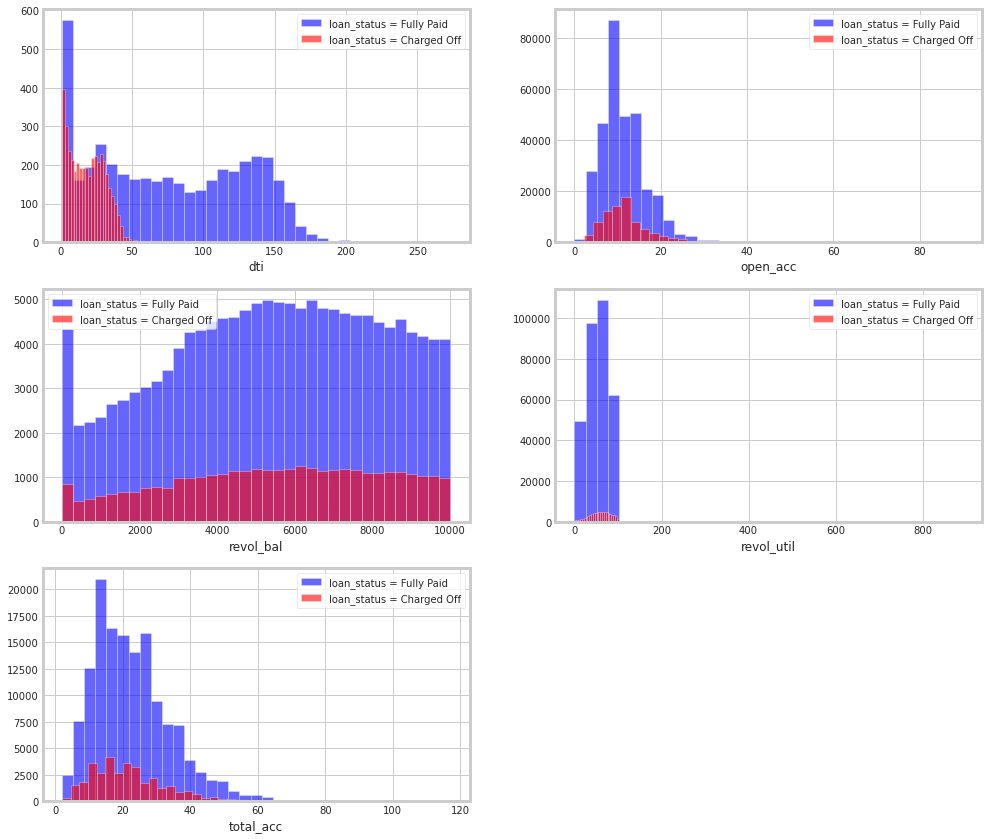

In [31]:

plt.figure(figsize=(15, 30))

plt.subplot(6, 2, 1)
data[data["loan_status"] == "Fully Paid"]["dti"].value_counts().hist(bins=35, color='blue', 
                                                                     label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["dti"].value_counts().hist(bins=35, color='red', 
                                                                      label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("dti")

plt.subplot(6, 2, 2)
data[data["loan_status"] == "Fully Paid"]["open_acc"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["open_acc"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("open_acc")

plt.subplot(6, 2, 3)
df = data[(data.revol_bal <= 10000)]
df[df["loan_status"] == "Fully Paid"]["revol_bal"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
df[df["loan_status"] == "Charged Off"]["revol_bal"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("revol_bal")

plt.subplot(6, 2, 4)
data[data["loan_status"] == "Fully Paid"]["revol_util"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["revol_util"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("revol_util")

plt.subplot(6, 2, 5)
df = data[(data.revol_bal <= 10000)]
df[df["loan_status"] == "Fully Paid"]["total_acc"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
df[df["loan_status"] == "Charged Off"]["total_acc"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("total_acc")

In [32]:
data.pub_rec.value_counts()

0.00     338272
1.00      49739
2.00       5476
3.00       1521
4.00        527
5.00        237
6.00        122
7.00         56
8.00         34
9.00         12
10.00        11
11.00         8
13.00         4
12.00         4
19.00         2
86.00         1
40.00         1
17.00         1
15.00         1
24.00         1
Name: pub_rec, dtype: int64

In [33]:
data.initial_list_status.value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

In [34]:
data.application_type.value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [35]:
data.mort_acc.value_counts()

0.00     139777
1.00      60416
2.00      49948
3.00      38049
4.00      27887
5.00      18194
6.00      11069
7.00       6052
8.00       3121
9.00       1656
10.00       865
11.00       479
12.00       264
13.00       146
14.00       107
15.00        61
16.00        37
17.00        22
18.00        18
19.00        15
20.00        13
24.00        10
22.00         7
21.00         4
25.00         4
27.00         3
23.00         2
32.00         2
26.00         2
31.00         2
30.00         1
28.00         1
34.00         1
Name: mort_acc, dtype: int64

In [36]:
data.pub_rec_bankruptcies.value_counts()

0.00    350380
1.00     42790
2.00      1847
3.00       351
4.00        82
5.00        32
6.00         7
7.00         4
8.00         2
Name: pub_rec_bankruptcies, dtype: int64

In [37]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [38]:
data['pub_rec'] = data.pub_rec.apply(pub_rec)
data['mort_acc'] = data.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies'] = data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

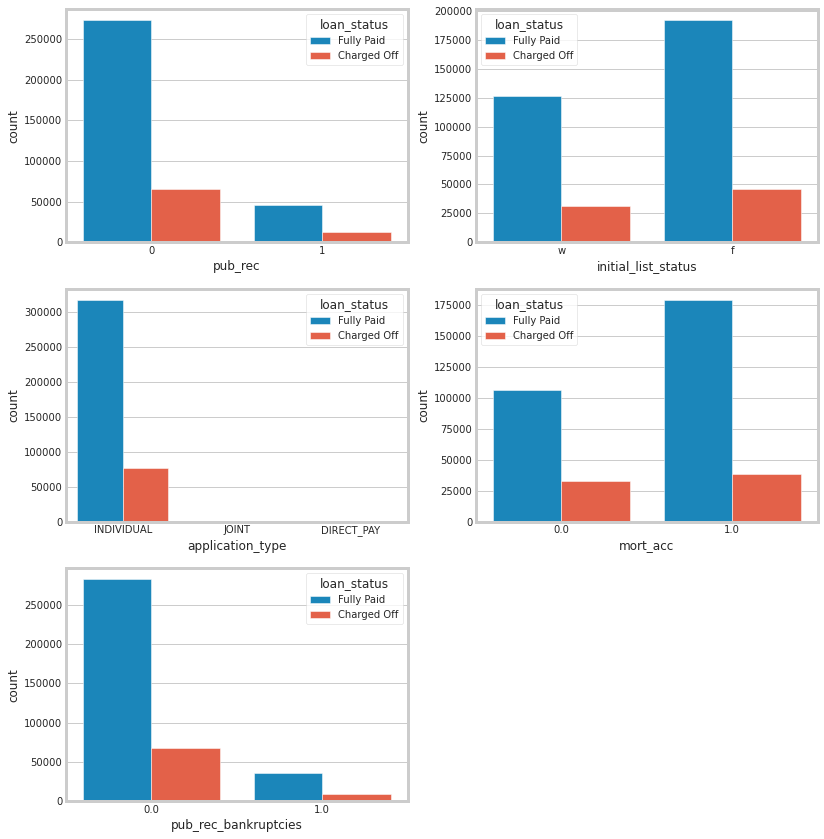

In [39]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=data, hue='loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=data, hue='loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=data, hue='loan_status')

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=data, hue='loan_status')

plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=data, hue='loan_status')

In [40]:
data['loan_status'] = data.loan_status.map({'Fully Paid':0, 'Charged Off':1})

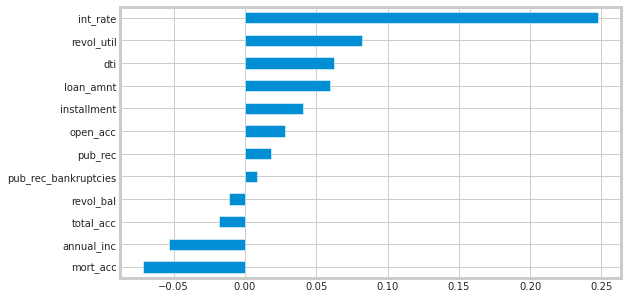

In [41]:
plt.figure(figsize=(8, 5))
data.corr()['loan_status'].drop('loan_status').sort_values().plot(kind='barh')

In [42]:
#missing values
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '22927' ==> '5.789%'
'emp_length': number of missing values '18301' ==> '4.621%'
'title': number of missing values '1755' ==> '0.443%'
'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [43]:
data.emp_title.nunique()

139595

In [44]:
data.drop('emp_title', axis=1, inplace=True)

In [45]:
data.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [46]:
for year in data.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{data[data.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

10+ years years in this position:
0   0.82
1   0.18
Name: loan_status, dtype: float64
4 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
< 1 year years in this position:
0   0.79
1   0.21
Name: loan_status, dtype: float64
6 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
9 years years in this position:
0   0.80
1   0.20
Name: loan_status, dtype: float64
2 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
3 years years in this position:
0   0.80
1   0.20
Name: loan_status, dtype: float64
8 years years in this position:
0   0.80
1   0.20
Name: loan_status, dtype: float64
7 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
5 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
1 year years in this position:
0   0.80
1   0.20
Name: loan_status, dtype: float64
nan years in this position:
Series([], Name: loan_status, dtype: float64)


In [47]:
data.drop('emp_length', axis=1, inplace=True)

In [48]:
data.title.value_counts().head()

debt consolidation         168108
credit card refinancing     51781
home improvement            17117
other                       12993
consolidation                5583
Name: title, dtype: int64

In [49]:
data.purpose.value_counts().head()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
Name: purpose, dtype: int64

In [50]:
data.drop('title', axis=1, inplace=True)

In [51]:
data.mort_acc.value_counts()

1.00    218458
0.00    139777
Name: mort_acc, dtype: int64

In [52]:
data.mort_acc.isna().sum()

37795

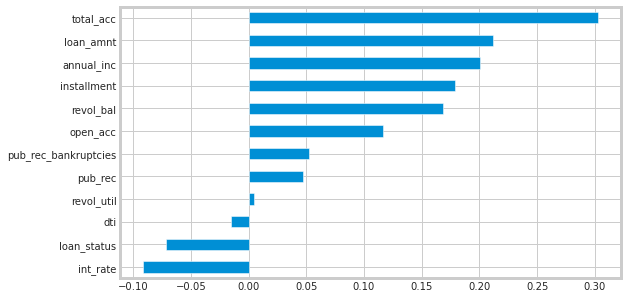

In [53]:
plt.figure(figsize=(8, 5))
data.corr()['mort_acc'].drop('mort_acc').sort_values().plot(kind='barh')

In [54]:
total_acc_avg = data.groupby(by='total_acc').mean().mort_acc

In [55]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [56]:
data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [57]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'revol_util': number of missing values '276' ==> '0.070%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [58]:
data.dropna(inplace=True)

In [59]:
data.shape

(395219, 24)

In [60]:
print([column for column in data.columns if data[column].dtype == object])

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']


In [61]:
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [62]:
term_values = {' 36 months': 36, ' 60 months': 60}
data['term'] = data.term.map(term_values)

In [63]:
data.term.unique()

array([36, 60])

In [64]:
data.drop('grade', axis=1, inplace=True)

In [65]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership']
data = pd.get_dummies(data, columns=dummies, drop_first=True)

In [66]:
data.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,...,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.00,36,11.44,329.48,117000.00,Jan-2015,0,26.24,Jun-1990,16.00,0,36369.00,41.80,25.00,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
1,8000.00,36,11.99,265.68,65000.00,Jan-2015,0,22.05,Jul-2004,17.00,0,20131.00,53.30,27.00,1.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,15600.00,36,10.49,506.97,43057.00,Jan-2015,0,12.79,Aug-2007,13.00,0,11987.00,92.20,26.00,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,7200.00,36,6.49,220.65,54000.00,Nov-2014,0,2.60,Sep-2006,6.00,0,5472.00,21.50,13.00,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,24375.00,60,17.27,609.33,55000.00,Apr-2013,1,33.95,Mar-1999,13.00,0,24584.00,69.80,43.00,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [67]:
data.drop('address', axis=1, inplace=True)

In [68]:
data.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,...,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.00,36,11.44,329.48,117000.00,Jan-2015,0,26.24,Jun-1990,16.00,0,36369.00,41.80,25.00,0.00,0.00,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
1,8000.00,36,11.99,265.68,65000.00,Jan-2015,0,22.05,Jul-2004,17.00,0,20131.00,53.30,27.00,1.00,0.00,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,15600.00,36,10.49,506.97,43057.00,Jan-2015,0,12.79,Aug-2007,13.00,0,11987.00,92.20,26.00,0.00,0.00,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,7200.00,36,6.49,220.65,54000.00,Nov-2014,0,2.60,Sep-2006,6.00,0,5472.00,21.50,13.00,0.00,0.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,24375.00,60,17.27,609.33,55000.00,Apr-2013,1,33.95,Mar-1999,13.00,0,24584.00,69.80,43.00,1.00,0.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [69]:
#data leakage
data.drop('issue_d', axis=1, inplace=True)

In [70]:
data['earliest_cr_line'] = data.earliest_cr_line.str.split('-', expand=True)[1]

In [71]:
data.earliest_cr_line.nunique()

65

In [72]:

data.drop_duplicates(inplace=True)


In [73]:
from sklearn.model_selection import train_test_split

X = data.drop('loan_status', axis=1)
y = data.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(276653, 69)
(118566, 69)
(276653,)
(118566,)


In [74]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [76]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [77]:
from xgboost import XGBClassifier

XGB_score = 0
trees = 0


for x in np.arange(100, 500, 50):
    xgb_clf = XGBClassifier(n_estimators=x).fit(X_train, y_train)
    clf_score = np.round(xgb_clf.score(X_train, y_train) * 100, 3)
    if clf_score > XGB_score:
        XGB = clf_score
        trees = x
        
print('Highest score is {0}% with {1} trees'.format(XGB,trees))


y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Highest score is 84.516% with 450 trees
Train Result:
Accuracy Score: 84.52%
_______________________________________________
CLASSIFICATION REPORT:
                0.0      1.0  accuracy  macro avg  weighted avg
precision      0.84     0.85      0.85       0.85          0.85
recall         0.99     0.25      0.85       0.62          0.85
f1-score       0.91     0.39      0.85       0.65          0.81
support   222387.00 54266.00      0.85  276653.00     276653.00
_______________________________________________
Confusion Matrix: 
 [[219989   2398]
 [ 40440  13826]]

Test Result:
Accuracy Score: 80.34%
_______________________________________________
CLASSIFICATION REPORT:
               0.0      1.0  accuracy  macro avg  weighted avg
precision     0.82     0.50      0.80       0.66          0.76
recall        0.97     0.12      0.80       0.55          0.80
f1-score      0.89     0.20      0.80       0.54          0.75
support   95309.00 23257.00      0.80  118566.00     118566.00
______

In [78]:
xgb_clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=450, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

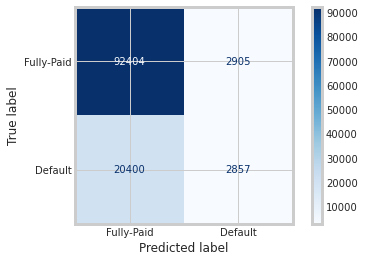

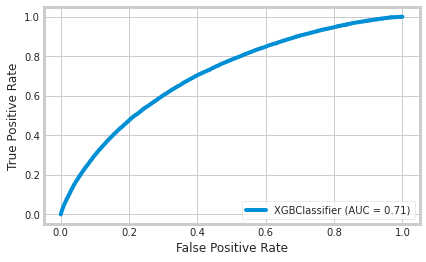

In [79]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

disp = plot_confusion_matrix(xgb_clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Fully-Paid', 'Default'])

disp = plot_roc_curve(xgb_clf, X_test, y_test)

In [80]:
import pickle

In [82]:
filename = 'gblendingclub.sav'
pickle.dump(xgb_clf, open(filename, 'wb'))

In [84]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0.0      1.0  accuracy  macro avg  weighted avg
precision      1.00     1.00      1.00       1.00          1.00
recall         1.00     1.00      1.00       1.00          1.00
f1-score       1.00     1.00      1.00       1.00          1.00
support   222387.00 54266.00      1.00  276653.00     276653.00
_______________________________________________
Confusion Matrix: 
 [[222387      0]
 [     7  54259]]

Test Result:
Accuracy Score: 80.57%
_______________________________________________
CLASSIFICATION REPORT:
               0.0      1.0  accuracy  macro avg  weighted avg
precision     0.81     0.54      0.81       0.68          0.76
recall        0.99     0.07      0.81       0.53          0.81
f1-score      0.89     0.12      0.81       0.50          0.74
support   95309.00 23257.00      0.81  118566.00     118566.00
_____________________________________________

In [ ]:
disp = plot_confusion_matrix(rf_clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Fully-Paid', 'Default'])

disp = plot_roc_curve(xgb_clf, X_test, y_test)
plot_roc_curve(rf_clf, X_test, y_test, ax=disp.ax_)